# Images as a functions

In [1]:
import os

from skimage import io
import skimage
import plotly.graph_objects as go

%pylab inline

BASE_DIR = '../../../images/computer-vision/2A-L1'

Populating the interactive namespace from numpy and matplotlib


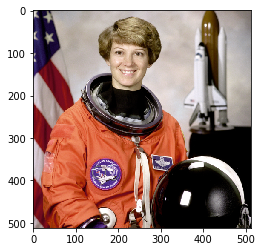

In [2]:
image = skimage.data.astronaut()
plt.imshow(image)
io.imsave(os.path.join(BASE_DIR, 'astronaut.png'), image)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


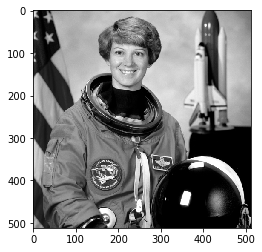

In [3]:
# convert image to grayscale
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap='gray');
io.imsave(os.path.join(BASE_DIR, 'astronaut_gray.png'), gray_image)

In [4]:
# examine images
print("Color")
print("Shape:", image.shape)
print("Data type:", image.dtype)
print("\nGray")
print("Shape:", gray_image.shape)
print("Data type:", gray_image.dtype)

Color
Shape: (512, 512, 3)
Data type: uint8

Gray
Shape: (512, 512)
Data type: float64


In [7]:
height, width, colors = image.shape

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


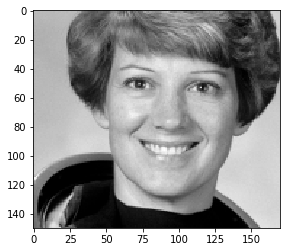

In [5]:
image_slice = gray_image[50:200, 130:300]
plt.imshow(image_slice, cmap='gray')
io.imsave(os.path.join(BASE_DIR, 'astronaut_gray_slice.png'), image_slice)

In [6]:
# orca installation required to save images from jupyter - https://github.com/plotly/orca
fig = go.Figure(data=[go.Surface(z=image_slice)])
fig.update_layout(scene={
    'zaxis': {'range': [0, 3]}
})
fig.show()
# fig.write_image(os.path.join(BASE_DIR, "astronaut_slice_surface.png"))

In [9]:
# images on computer
image_slice[:5, :5]

array([[0.71698431, 0.72931451, 0.72595843, 0.71868078, 0.72793059],
       [0.72931451, 0.72737216, 0.73073608, 0.72315294, 0.72343569],
       [0.71896353, 0.71447647, 0.72371843, 0.71868078, 0.71756471],
       [0.71502706, 0.71952196, 0.7251251 , 0.71979686, 0.72708941],
       [0.71699922, 0.71336039, 0.71560039, 0.7153098 , 0.71923137]])

# Noise

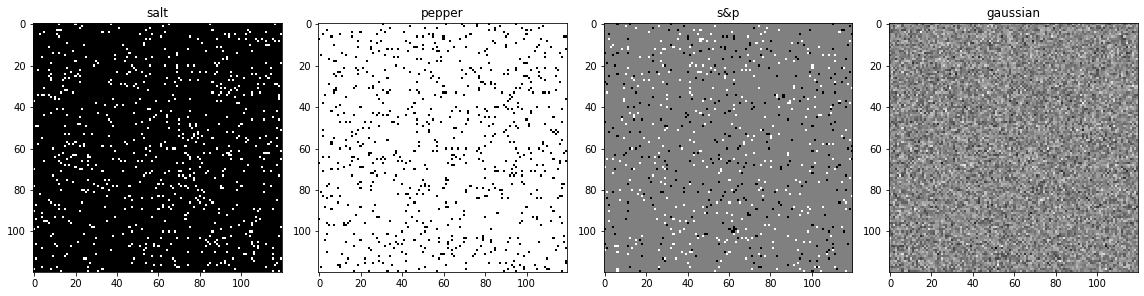

In [18]:
# generate different noise
salt_image = skimage.util.random_noise(np.zeros((120, 120)), mode='salt')
pepper_image = skimage.util.random_noise(np.ones((120, 120)), mode='pepper')
salt_and_pepper = skimage.util.random_noise(np.ones((120, 120)) / 2, mode='s&p')
gaussian = np.random.normal(mean, 0.01 ** 0.5, (120, 120))
noise_images = [salt_image, pepper_image, salt_and_pepper, gaussian]
titles = ['salt', 'pepper', 's&p', 'gaussian']

nrows = 1
ncols = 4

fig=plt.figure(figsize=(16, 4))
for idx, (noisy_image, title) in enumerate(zip(noise_images, titles)):
    axes = fig.add_subplot(nrows, ncols, idx + 1)
    axes.title.set_text(title)
    plt.imshow(noisy_image, cmap='gray')
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'noises.png'))

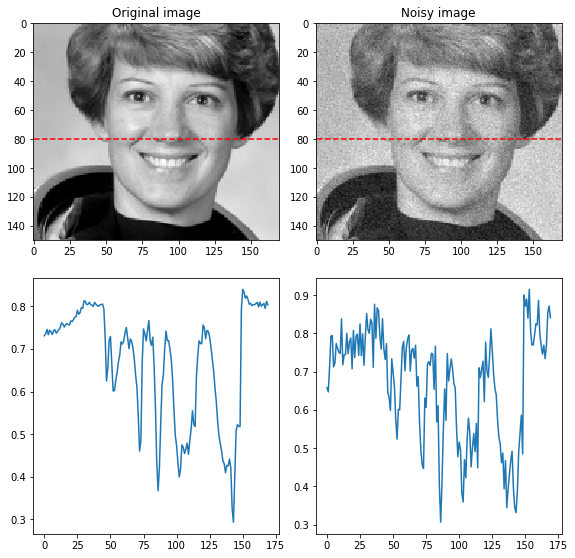

In [41]:
nrows = 2
ncols = 2

fig = plt.figure(figsize(8, 8))

axe = fig.add_subplot(nrows, ncols, 1)
axe.title.set_text("Original image")
plt.imshow(image_slice, cmap='gray')
plt.plot([0, image_slice.shape[1] - 1], [80, 80], '--r')

axe = fig.add_subplot(nrows, ncols, 2)
axe.title.set_text("Noisy image")
noise = np.random.normal(mean, 0.05, image_slice.shape)
noisy_image = image_slice + noise
plt.imshow(noisy_image, cmap='gray')
plt.plot([0, image_slice.shape[1] - 1], [80, 80], '--r')

axe = fig.add_subplot(nrows, ncols, 3)
plt.plot(image_slice[80, :])

axe = fig.add_subplot(nrows, ncols, 4)
plt.plot(noisy_image[80, :]);

plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'applied_noise_example.png'))

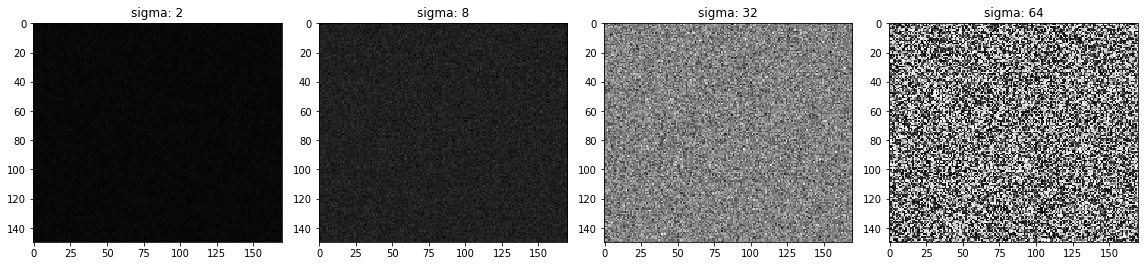

In [62]:
# Different Gaussian noise
sigmas = [2, 8, 32, 64]
nrows = 1
ncols = len(sigmas)
mean = 0

fig = plt.figure(figsize=(16, 4))
for idx, sigma in enumerate(sigmas):
    noise = np.random.normal(mean, sigma, image_slice.shape)
    noise += abs(noise.min())
    noise = noise.astype('uint8')
    axes = fig.add_subplot(nrows, ncols, idx + 1)
    axes.title.set_text(f"sigma: {sigma}")
    plt.imshow(noise, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'gaussian_noise.png'))

# Filtering

In [ ]:
# filter with various filters
from scipy import signal

noisy_image = skimage.util.random_noise(image_slice, mode='gaussian', var=0.01)

# average filter
kernel_average = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) / 9
filtered_image_average = signal.correlate2d(noisy_image, kernel_average)

# gaussian filter(simple)
kernel_gaussian = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16
filtered_image_gaussian = signal.correlate2d(noisy_image, kernel_gaussian)

fig = plt.figure(figsize=(12, 7))
images_to_plot = [noisy_image, filtered_image_average, filtered_image_gaussian]
titles = ['noisy', 'average filter', 'gaussian filter']
for idx, (image, title) in enumerate(zip(images_to_plot, titles)):
    axe = fig.add_subplot(1, 3, idx + 1)
    axe.title.set_text(title)
    plt.imshow(image, cmap='gray')